In [1]:
import matplotlib.pyplot as plt
import scipy.io as sio
import skimage.io
import numpy as np
import h5py
import sys
import gc

sys.path.append('../Visualization/')
from Data_Extractor import *
import Visualization as vis

/home/admin-u6142160/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
path_train_set = "../Data/090085/Road_Data/motor_trunk_pri_sec_tert_uncl_track/posneg_seg_coord_split_128_18_train"

# Load training set
train_set = h5py.File(path_train_set, 'r')
train_pos_topleft_coord = np.array(train_set['positive_example'])
train_neg_topleft_coord = np.array(train_set['negative_example'])
train_raw_image = np.array(train_set['raw_image'])
train_road_mask = np.array(train_set['road_mask'])
train_set.close()
gc.collect()


43

In [5]:
path_cv_set = "../Data/090085/Road_Data/motor_trunk_pri_sec_tert_uncl_track/posneg_seg_coord_split_128_18_cv"

# Load cross-validation set
CV_set = h5py.File(path_cv_set, 'r')
CV_pos_topleft_coord = np.array(CV_set['positive_example'])
CV_neg_topleft_coord = np.array(CV_set['negative_example'])
CV_raw_image = np.array(CV_set['raw_image'])
CV_road_mask = np.array(CV_set['road_mask'])
CV_set.close()

gc.collect()

0

In [3]:
norm='Gaussian'
size=128
Train_Data = FCN_Data_Extractor (train_raw_image, train_road_mask, size,
                             pos_topleft_coord = train_pos_topleft_coord,
                             neg_topleft_coord = train_neg_topleft_coord,
                             normalization = norm)

mu =  [ 117.08104981  160.62967693  332.04874998  318.74745584 2467.27518735
 1220.89931865  612.68672644]
std =  [102.56702327 121.99926965 214.03254341 226.63697312 858.19860562
 768.0637808  478.01478468]


In [14]:
i = 0
for coord, patch in Train_Data.iterate_raw_image_patches_with_coord(norm=True):
    i += 1
print(i)

3507


In [10]:
batch_x, batch_y = Train_Data.get_patches(1, positive_num=1, norm=False)

In [11]:
batch_x = batch_x[0]
batch_y = batch_y[0, :, :, 1]

In [12]:
print(batch_x.shape, batch_y.shape)

(7, 128, 128) (128, 128)


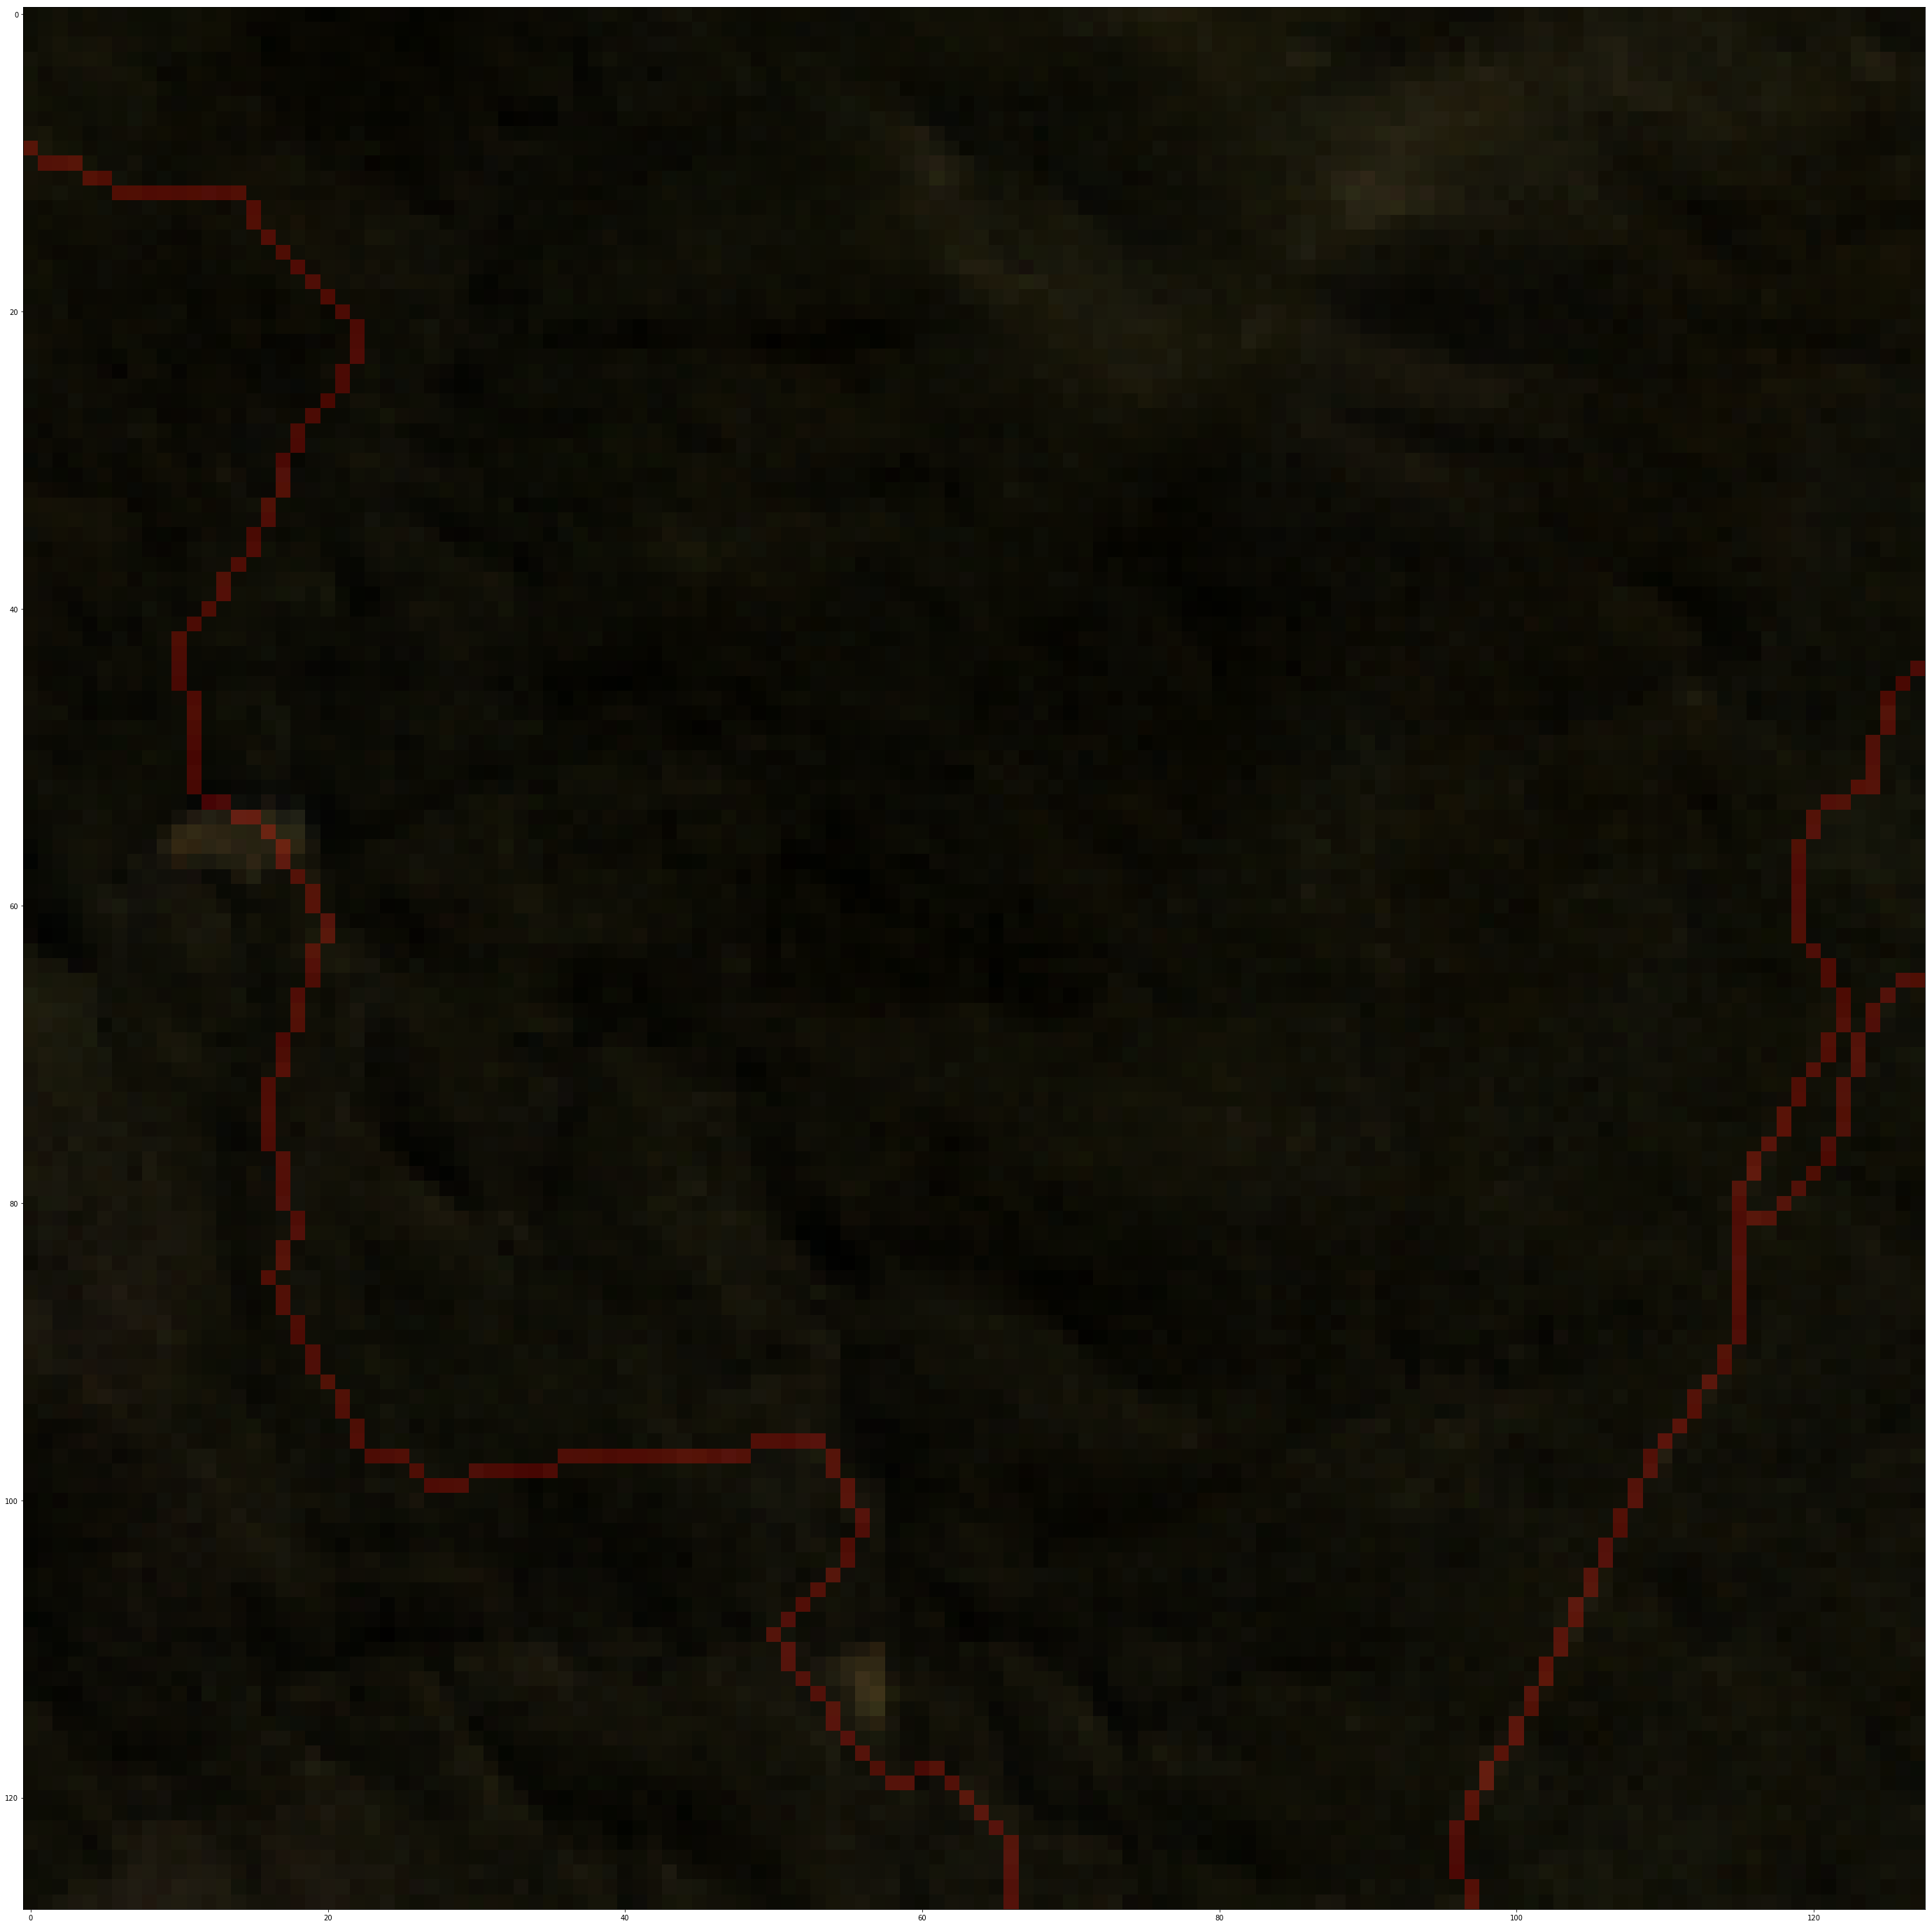

In [13]:
vis.show_pred_prob_with_raw(batch_x, batch_y, show_plot=True, figsize=(50,50))